## VISUALIZACIÓN Y ANALISIS

#### 1. Importamos las librerías que utilizaremos

In [53]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

#### 1. Importamos los data sets

In [54]:
te = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/temperature.csv')

In [55]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [56]:
temc = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/temc')

In [57]:
temc.head(3)

,Date,Vancouver,Los Angeles,Denver,Houston,Kansas City,Chicago,Atlanta,Miami,Toronto,New York,Montreal
0,2012-10,10.050,19.260,9.730,21.960,13.0400,10.390,16.080,26.25,10.11,14.750,10.600
1,2012-11,7.165,15.500,7.190,17.465,7.5875,4.885,9.395,21.66,3.55,5.695,1.255
2,2012-12,4.025,13.245,0.275,17.255,3.7850,2.455,9.935,22.19,0.75,4.490,-3.135


In [58]:
co2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/co2')

In [59]:
co2.head(3)

,Date,Co2 Level
0,2011-01,391.68
1,2011-02,391.73
2,2011-03,391.76


In [60]:
tyc = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/tyc') 

In [61]:
tyc.head(3)

,Date,Vancouver,Los Angeles,Denver,Houston,Kansas City,Chicago,Atlanta,Miami,Toronto,New York,Montreal,Co2 Level
0,2012-10,10.050,19.260,9.730,21.960,13.0400,10.390,16.080,26.25,10.11,14.750,10.600,391.910
1,2012-11,7.165,15.500,7.190,17.465,7.5875,4.885,9.395,21.66,3.55,5.695,1.255,393.825
2,2012-12,4.025,13.245,0.275,17.255,3.7850,2.455,9.935,22.19,0.75,4.490,-3.135,394.810


In [62]:
volat = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/volat') 

In [63]:
volat.head(3)

,Date,Vancouver,Seattle,Los Angeles,San Diego,Denver,Houston,Kansas City,Chicago,Atlanta,Miami,Toronto,New York,Montreal
0,2012-10,3.130523,3.999231,4.263771,4.175848,6.894258,5.723989,6.785850,5.520356,5.008962,2.860240,3.848640,4.224081,4.209785
1,2012-11,2.804393,3.495251,4.240395,4.075629,6.031214,6.045385,6.581141,5.044258,5.404182,3.539569,3.826464,3.884161,5.033899
2,2012-12,2.028313,2.209731,3.574514,3.592230,7.193060,7.092119,7.189335,5.324373,5.596881,3.963114,4.360173,4.085010,5.721749


In [64]:
hm = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/hm') 

In [65]:
hm.head(3)

,Date,Vancouver,Los Angeles,Denver,Houston,Kansas City,Chicago,Atlanta,Miami,Toronto,New York,Montreal
0,2012-10,81.0,64.0,40.0,76.0,61.0,62.0,76.0,74.0,74.0,71.0,76.0
1,2012-11,87.0,72.0,35.0,68.0,57.0,63.0,70.0,67.0,74.0,64.0,70.0
2,2012-12,93.0,76.0,37.0,73.0,67.0,72.0,76.0,73.0,79.0,69.0,79.0


In [66]:
cco2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/cco2')

In [67]:
cco2.head(3)

,Date,Co2 Level
0,2012-10,391.910
1,2012-11,393.825
2,2012-12,394.810


### GRAFICOS

#### 1. Definimos los parámetros generales de nuestros gráficos

In [68]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,8.)})
sns.set_style("whitegrid")

#### DIÓXIDO DE CARBONO (2011-2021)

#### En el siguiente gráfico se puede observar el progresivo aumento de los niveles de co2 en la atmósfera durante el período mencionado. Los niveles están expresados como una medida de la proporción entre moléculas de co2 y de aire seco. 

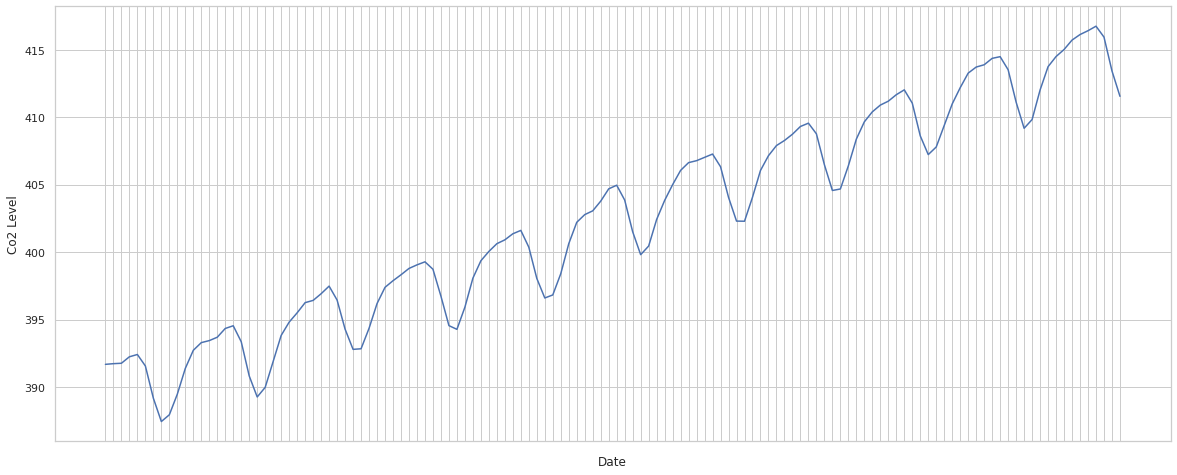

In [69]:
c = sns.lineplot(data=co2, x="Date", y="Co2 Level").set_xticklabels(labels=[], rotation=75);

#### TEMPERATURAS MENSUALES (2012 - 2017)

#### A continuación podemos ver la evolución temporal de las temperaturas mensuales de cinco grandes ciudades de EEUU y Canadá. Se puede ver la estacionalidad de las mismas, pero el gráfico no presenta una tendencia clara de aumento, es probable que esto sea así dado que estamos considerando datos de solo dos países de América del Norte y en una ventana reducida de tiempo.  

<ipython-input-70-93ef3071cb36>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(x="Date", y="Los Angeles", data=temc, ax=axs[4]).set_xticklabels(labels=temc["Date"], rotation=60);


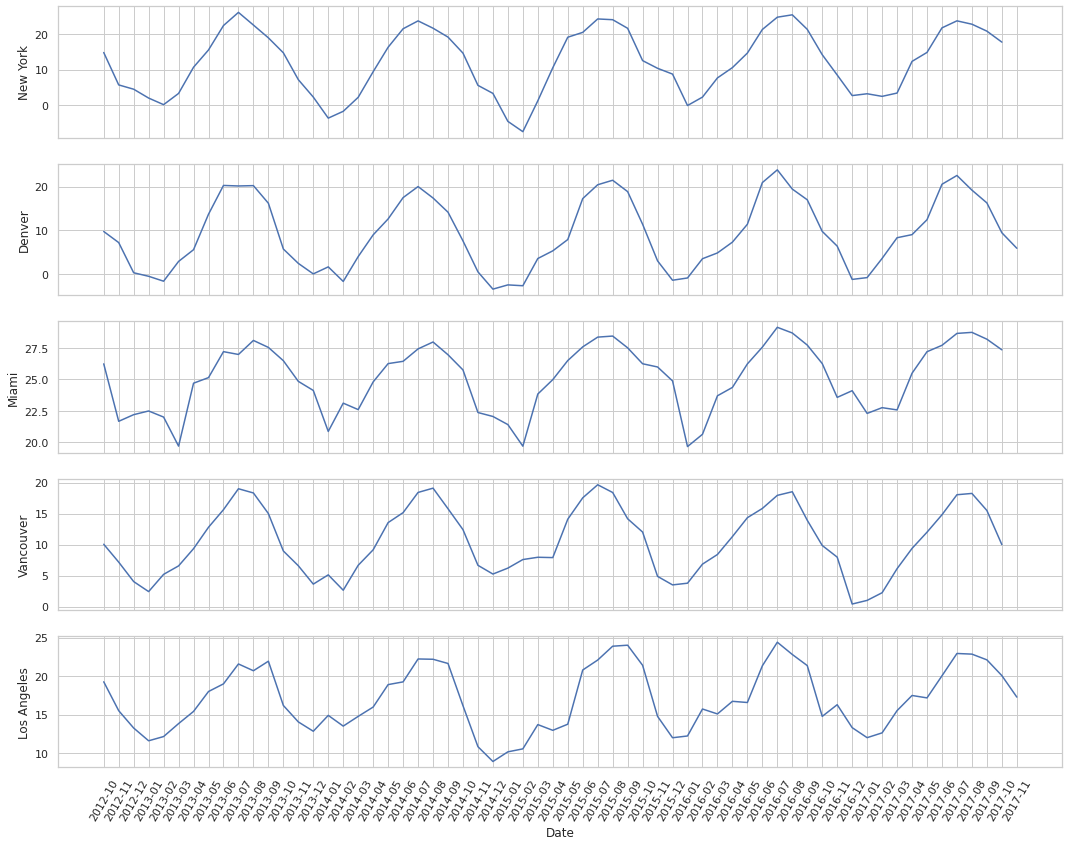

In [70]:
fig, axs = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(18, 14))
sns.lineplot(x="Date", y="New York", data=temc, ax=axs[0])
sns.lineplot(x="Date", y="Denver", data=temc, ax=axs[1])
sns.lineplot(x="Date", y="Miami", data=temc, ax=axs[2])
sns.lineplot(x="Date", y="Vancouver", data=temc, ax=axs[3])
sns.lineplot(x="Date", y="Los Angeles", data=temc, ax=axs[4]).set_xticklabels(labels=temc["Date"], rotation=60);

#### VARIABILIDAD MENSUAL DE LAS TEMPERATURAS VS EVOLUCIÓN DEL CO2 (2012-2017)

#### Sin embargo, si graficamos la variabilidad mensual de las temperaturas junto con la evolución temporal del co2, se puede ver como en los periodos donde aumenta el co2, la variabilidad de las temperaturas aumenta. SIn embargo en la gŕafica de las ciudades de la costa este, esta relación no parece ser tan evidente.

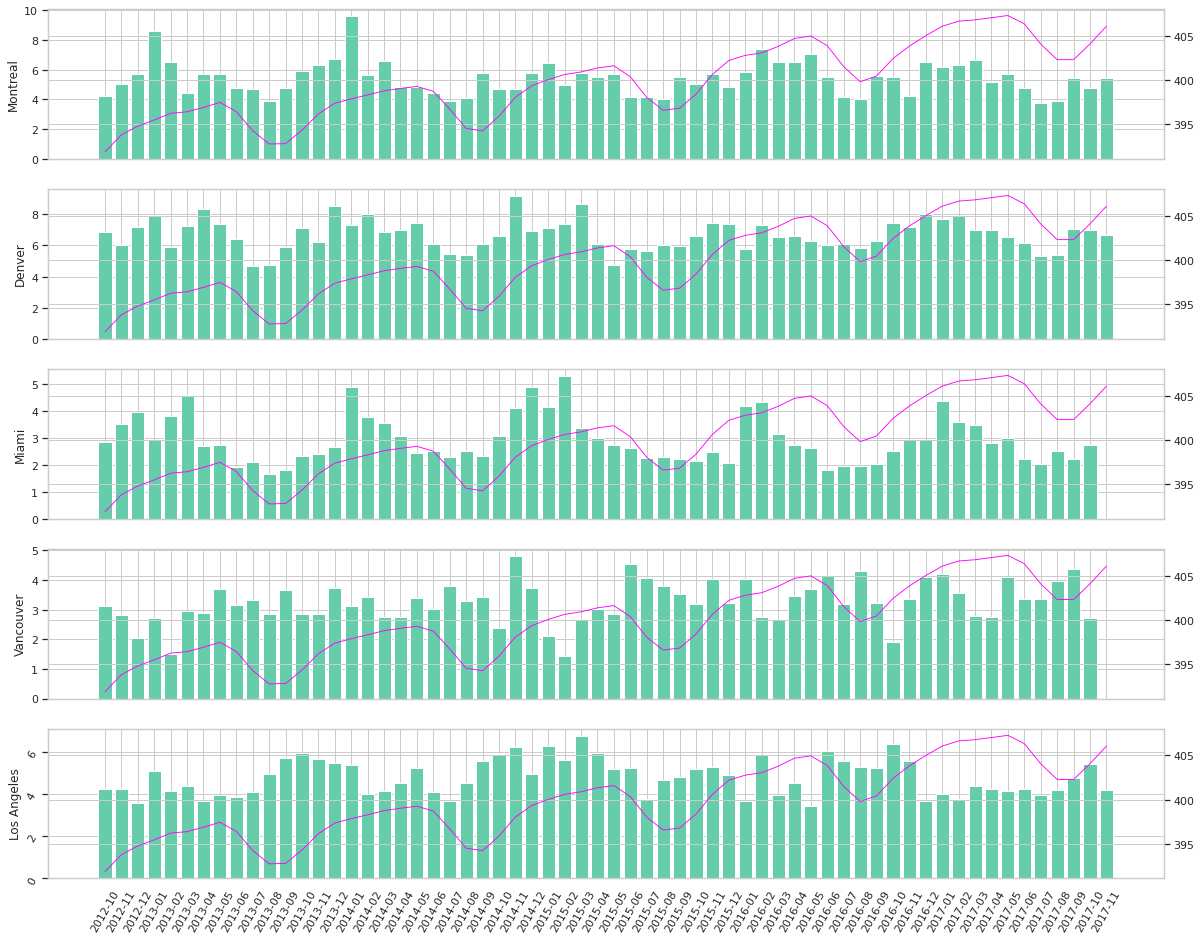

In [74]:
fig, ((x1, x2, x3, x4, x5)) = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(20, 16))

x1.bar(volat.Date, volat.Montreal, color="mediumaquamarine")
x1.set_ylabel('Montreal')
x2.bar(volat.Date, volat.Denver, color="mediumaquamarine")
x2.set_ylabel('Denver')
x3.bar(volat.Date, volat.Miami, color="mediumaquamarine")
x3.set_ylabel('Miami')
x4.bar(volat.Date, volat.Vancouver, color="mediumaquamarine")
x4.set_ylabel('Vancouver')
x5.bar(volat.Date, volat['Los Angeles'], color="mediumaquamarine")
x5.set_ylabel('Los Angeles')


b = x1.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x2.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x3.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x4.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x5.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

x5.tick_params(labelrotation=60);

#### CORRELACIÓN NEGATIVA ENTRE TEMPERATURAS Y CO2 

#### A partir de la correlación entre las temperaturas y el co2, se puede observar una fuerte relación inversa entre las dos variables. El resto de correlaciones parecería seguir un patrón geográfico, cuanto más cerca están entre si, muestran más correlación

<AxesSubplot:>

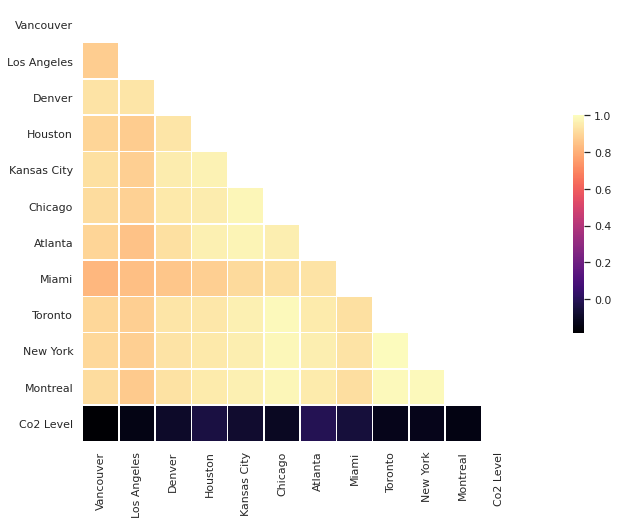

In [75]:
tro = tyc.corr()
mascara = np.triu(np.ones_like(tro, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores


sns.heatmap(tro, 
            mask=mascara,
            cmap="magma",
            vmax=1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5})

#### EVOLUCIÓN TEMPORAL DEL CO2 CON TEMPERATURAS (ESTACIONALIDAD)

#### Más aún, si graficamos la evolución de los niveles de co2 superponiéndolos con los datos de las temperaturas, se puede ver la relación estacional de ambos, durante el invierno los niveles de co2 aumentan, y durante el verano descienden, al margen de la tendencia positiva del co2. Esta dinámica muestra el rol de los bosques, en este caso del América del Norte, en los niveles de co2, durante el otoño-invierno, los bosques disminuyen la absorción del co2 , y durante la primavera-verano, consumen más co2.

<ipython-input-76-3fb48b5b7f5c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.scatterplot(x="Date", y="Co2 Level", hue="Los Angeles", data=tyc, size="Los Angeles", sizes=(40, 80), ax=axs[3]).set_xticklabels(labels=tyc["Date"], rotation=60);


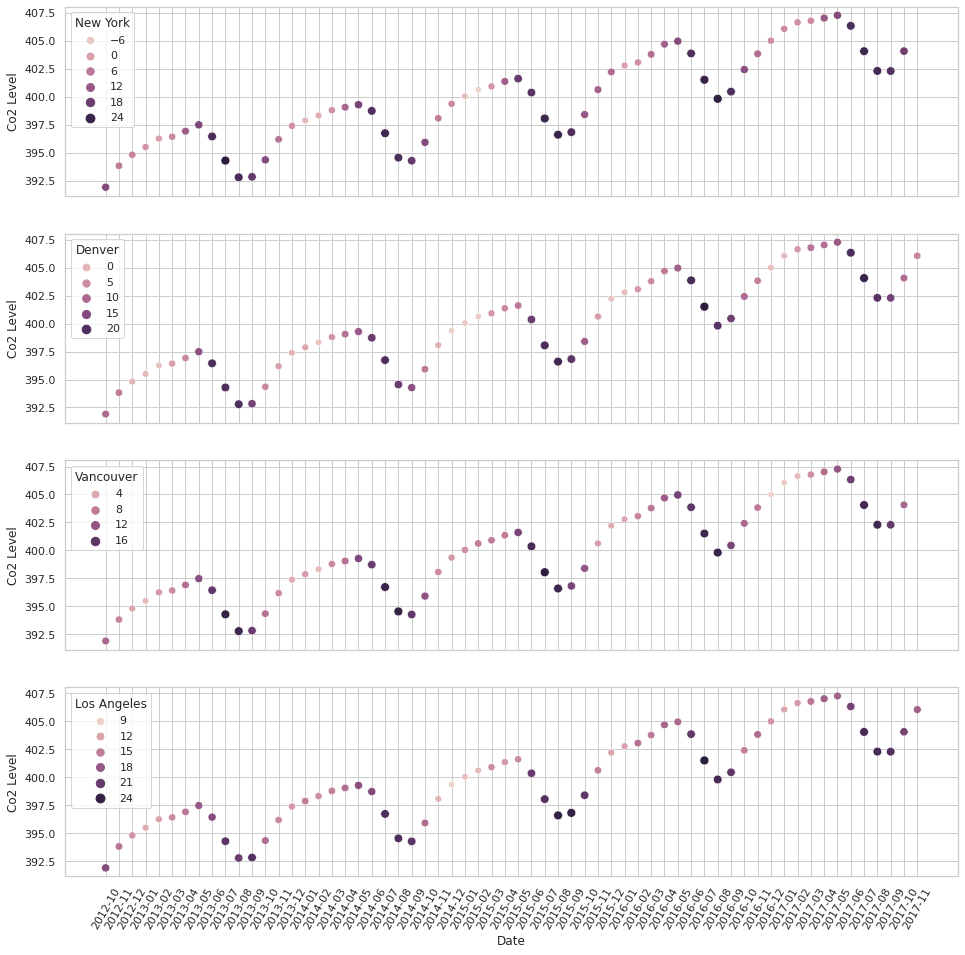

In [76]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(16, 16))
sns.scatterplot(x="Date", y="Co2 Level", hue="New York", data=tyc, size="New York", sizes=(40, 80), ax=axs[0])
sns.scatterplot(x="Date", y="Co2 Level", hue="Denver", data=tyc, size="Denver", sizes=(40, 80), ax=axs[1])
sns.scatterplot(x="Date", y="Co2 Level", hue="Vancouver", data=tyc, size="Vancouver", sizes=(40, 80), ax=axs[2])
sns.scatterplot(x="Date", y="Co2 Level", hue="Los Angeles", data=tyc, size="Los Angeles", sizes=(40, 80), ax=axs[3]).set_xticklabels(labels=tyc["Date"], rotation=60);

#### NIVELES MENSUALES DE HUMEDAD VS CO2  (2012-2017)

#### Con respecto a la relacion entre los niveles de humedad y co2, parecería haber una relación inversa entre ambas, aumentos en los niveles de humedad coincidentes con los descensos estivales en los niveles de co2.  Esto puede tener que ver con el hecho de que el aire caliente, puede transportar más vapor de agua que el frío. Aunque otra vez, Los Angeles, en la costa oeste, parece tener una dinámica diferente. 

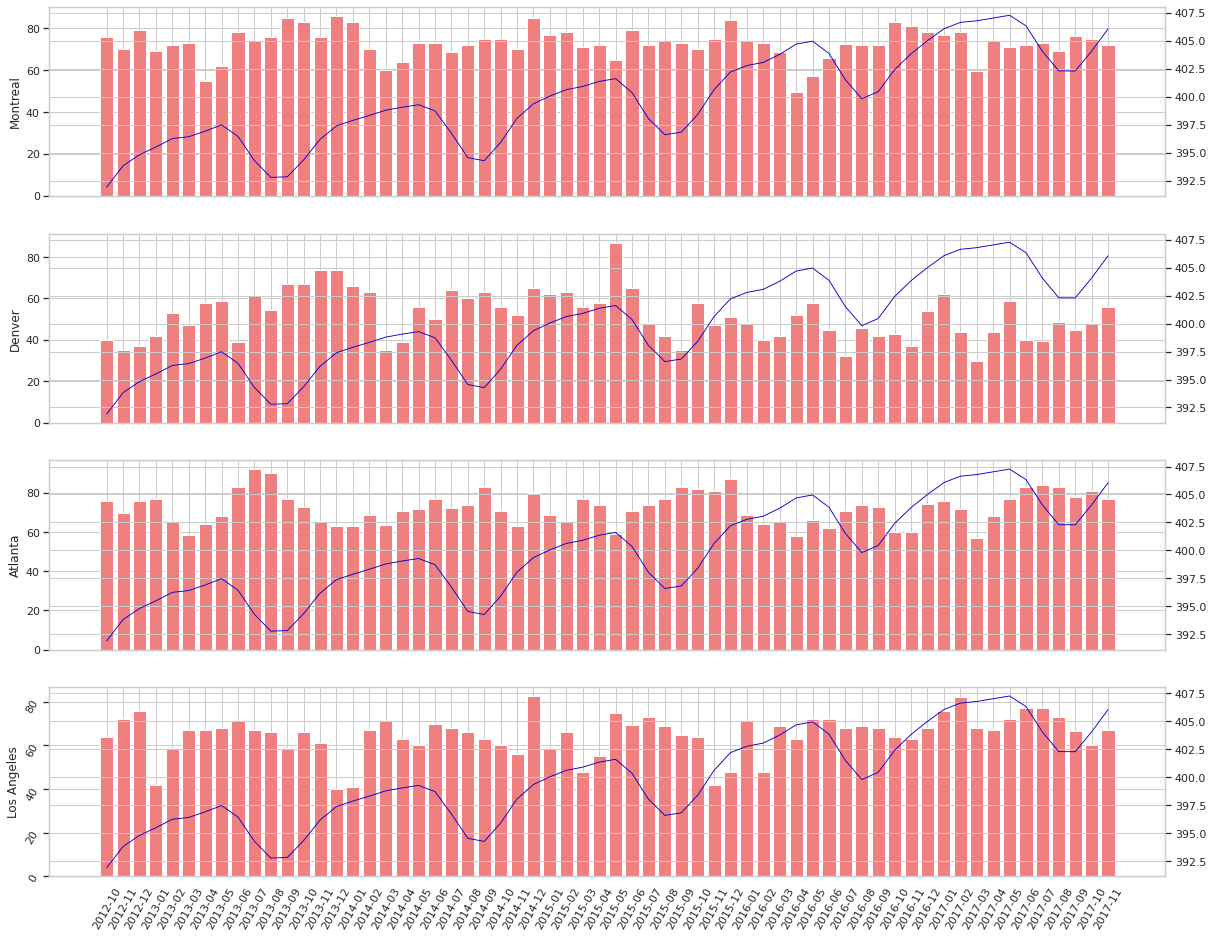

In [77]:
fig, ((x1, x2, x3, x4)) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20, 16))

x1.bar(hm.Date, hm.Montreal, color="lightcoral")
x1.set_ylabel('Montreal')
x2.bar(hm.Date, hm.Denver, color="lightcoral")
x2.set_ylabel('Denver')
x3.bar(hm.Date, hm.Atlanta, color="lightcoral")
x3.set_ylabel('Atlanta')
x4.bar(hm.Date, hm['Los Angeles'], color="lightcoral")
x4.set_ylabel('Los Angeles')

b = x1.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x2.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x3.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x4.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

x4.tick_params(labelrotation=60);